In [4]:
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from dist_rsa.debugging.low_dim.l1_discrete import l1_model
%matplotlib inline


In [7]:
def titrate(size,amount,l1_sig1,subj, quds,only_trivial,pred,just_s1,possible_utterances,discrete=True,just_l0=False,sig1=0.1,sig2=0.1,variational=False,step_size=1e-3,mixture_variational=False):
    results = l1_model(subj=subj,
                             pred=pred,
                             sig1=sig1,
                             sig2=sig2,
                             l1_sig1=l1_sig1,
                             resolution=(size,amount),
                             quds=quds,
                             only_trivial=only_trivial,
                             just_s1=just_s1,
                             just_l0=just_l0,
                             possible_utterances=possible_utterances,
                             discrete=discrete,
                             variational=True,
                             step_size=step_size,
                             mixture_variational=mixture_variational,
                            )


#     n=np.asarray([1 if x[1]==3 or x[0]==3 else 0 for x in results[1]])
# #     print(results[0].shape)
# #     print(n.shape)
#     print("\n\n\nRESULTS\n\n\n")
#     print(n)
#     n=np.reshape(n,(size*2,size*2))
    
#     hm = pnd.DataFrame(n,columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#     seaborn.heatmap(hm)
    
#     return None

    if discrete or mixture_variational:
#         if not just_s1:
#             print("QUDS: ", list(zip(quds,np.exp(results[-1]))))
        hm = pnd.DataFrame((results[0]),columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#         print(hm)

        seaborn.heatmap(hm)
    
    else: print("QUDS",[(x,np.exp(y)) for (x,y) in results[-1]])
#         results[0][size,:]=0.75
#         results[0][:,size]=0.75
#         results[0][size,size+3]=2
#         results[0][size,size+1]=2




UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 2
RUNNING DISCRETE MODEL
(2, 2, 2) (2, 1, 2)
(2, 2) shape out


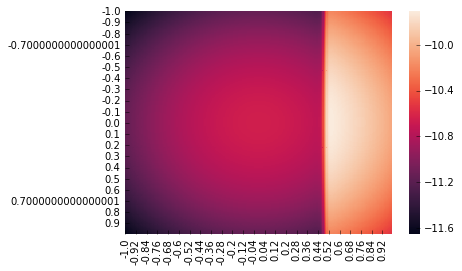

In [8]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 2
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
QUD MATRIX Tensor("Cast_21:0", shape=(2, 2, 1), dtype=float32) [[[0.]
  [1.]]

 [[1.]
  [0.]]]
projection shapes Tensor("ExpandDims_24:0", shape=(2, 1), dtype=float32) Tensor("transpose_99:0", shape=(2, 2), dtype=float32)
shape projected listener worlds Tensor("MatMul_20:0", shape=(2, 1), dtype=float32) [[0.]
 [0.]]
['swims'] CURRENT QUD
[0.] sample
s1_world [[-0.         -0.99461156]]
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
['shark', 'swimmer']
utterance index 0
[0.5 0.5] likelihoods
1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 2.501
SUBSPACE MEAN [0.]
full mean shapes Tensor("tr

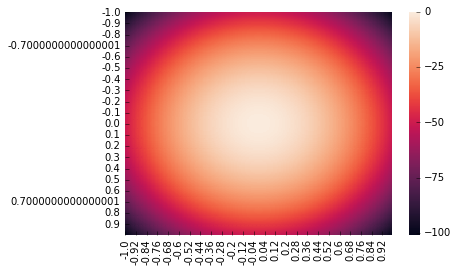

In [9]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
RUNNING DISCRETE MODEL
(1, 2, 2) (1, 1, 2)
(1, 2) shape out


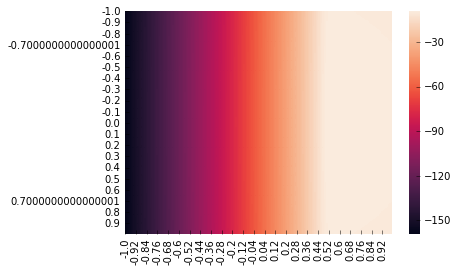

In [10]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False)

In [13]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['vicious']]
quds 1
QUD MATRIX Tensor("Cast_44:0", shape=(1, 2, 1), dtype=float32) [[[1.]
  [0.]]]
projection shapes Tensor("ExpandDims_50:0", shape=(2, 1), dtype=float32) Tensor("transpose_201:0", shape=(2,), dtype=float32)


ValueError: Shape must be rank 2 but is rank 1 for 'MatMul_37' (op: 'MatMul') with input shapes: [2], [2,1].

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 0.1 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('swims', 0.99999905)]


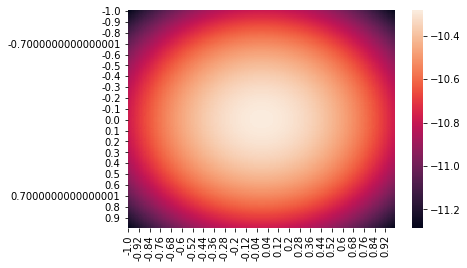

In [29]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 0.1 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('vicious', 1.0)]


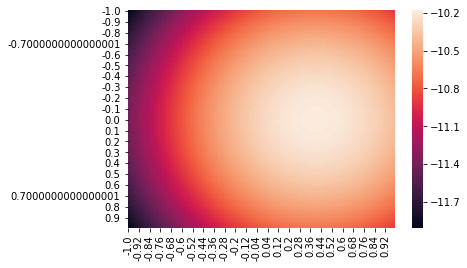

In [30]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=0.1,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1000.0 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('swims', 0.5653072), ('vicious', 0.4346945)]


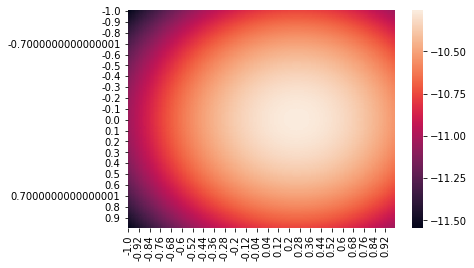

In [43]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["swims","vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1000.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('swims', 0.5311497), ('vicious', 0.46880502)]


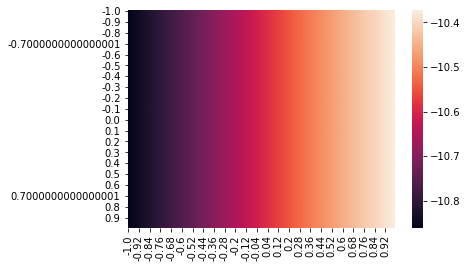

In [33]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["swims","vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('swims', 1.0)]


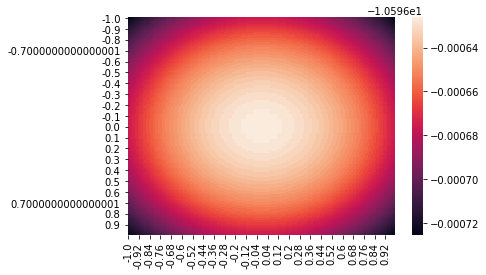

In [34]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('vicious', 1.0)]


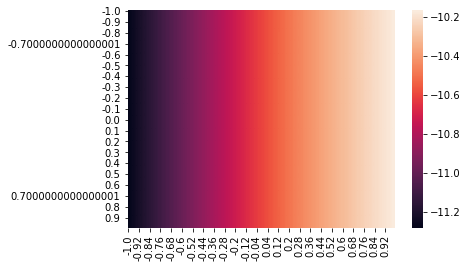

In [35]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.5311497), ('swims', 0.46880502)]


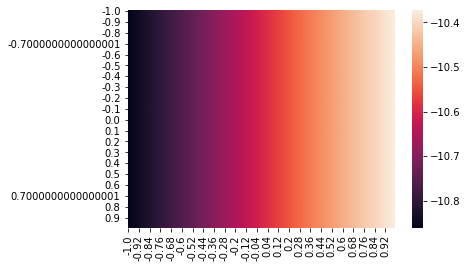

In [39]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious","swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.5200573), ('swims', 0.4799865)]


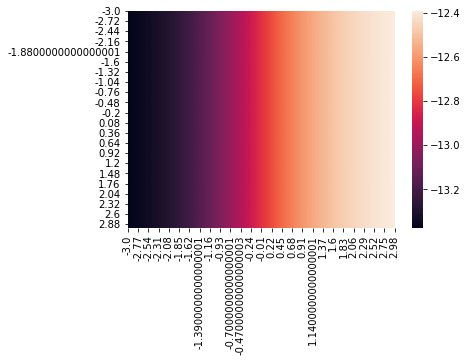

In [46]:
titrate(size=300,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious","swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

fish not in vecs
UTTERANCES:
 ['shark']
subject: ['man']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 1 possible utterances and 2
(2, 1, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.49998617), ('swims', 0.49998617)]


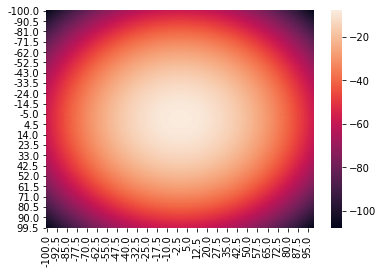

In [47]:
titrate(size=200,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],subj="man",pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0)

UTTERANCES:
 ['shark', 'fish']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
FOO
DOUBLE FOO
(2, 2, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.4868942), ('swims', 0.51310563)]


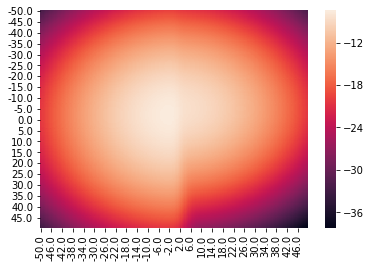

In [19]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.1195329), ('swims', 0.88046676)]


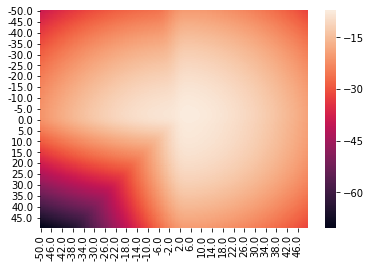

In [20]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.47533825), ('swims', 0.5246618)]


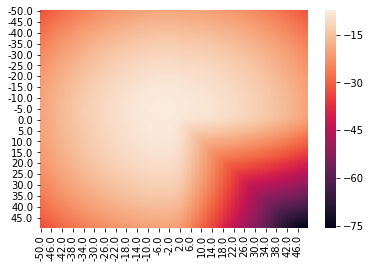

In [21]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)